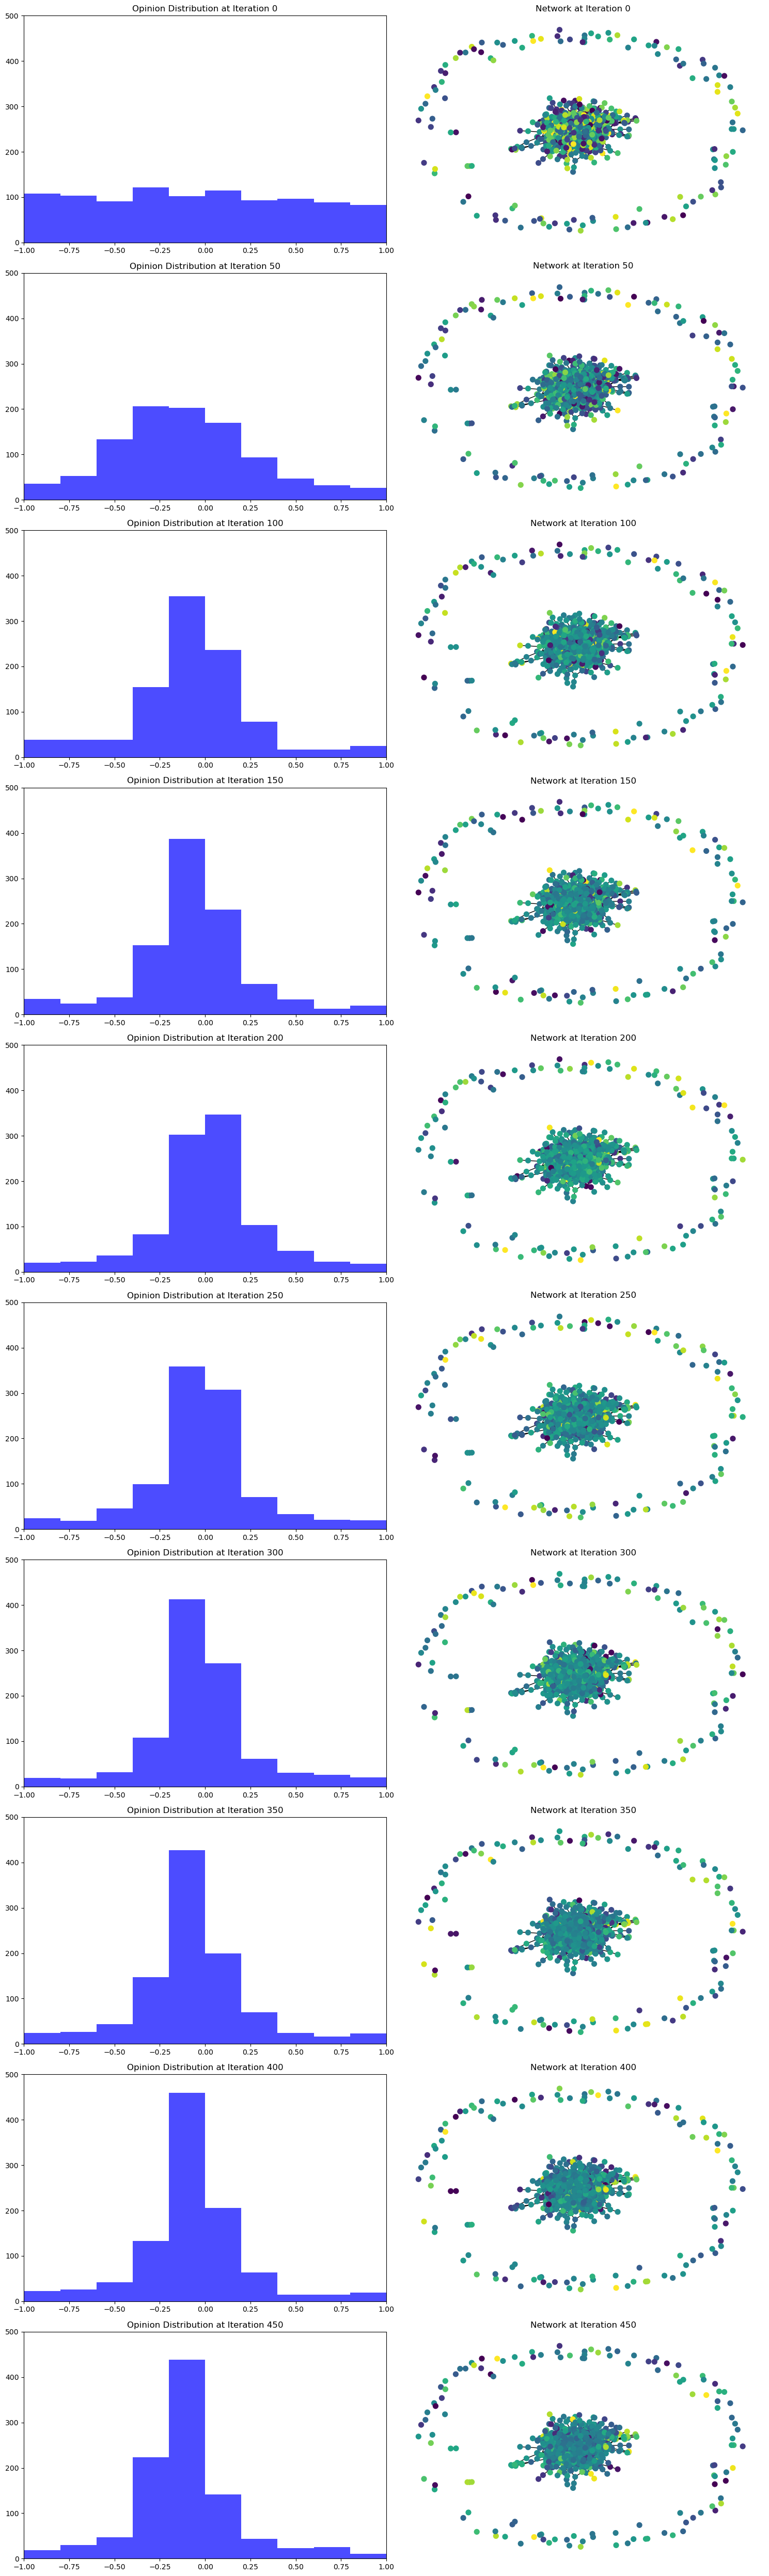

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

class Agent:
    def __init__(self, id, opinion, conformity, tolerance, target_degree):
        self.id = id
        self.opinion = opinion
        self.conformity = conformity
        self.tolerance = tolerance
        self.target_degree = target_degree

    def fluctuate_opinion(self, fluctuation_std=0.1):
        self.opinion = np.clip(np.random.normal(self.opinion, fluctuation_std), -1, 1)

    def conform_opinion(self, neighbors_opinions):
        if neighbors_opinions:
            mean_neighbors_opinion = np.mean(neighbors_opinions)
            self.opinion = self.conformity * mean_neighbors_opinion + (1 - self.conformity) * self.opinion

    def probability_break_bond(self, other_agent, opinion_range=1):
        opinion_difference = abs(self.opinion - other_agent.opinion)
        return (opinion_difference / opinion_range) * (1 - self.tolerance)

    def probability_make_bond(self, other_agent, opinion_range=1):
        opinion_difference = abs(self.opinion - other_agent.opinion)
        return (1 - (opinion_difference / opinion_range)) * self.tolerance * other_agent.tolerance

def initialize_agents(num_agents, opinion_range, conformity_range, tolerance_range, degree_range):
    agents = []
    for i in range(num_agents):
        opinion = np.random.uniform(*opinion_range)
        conformity = np.random.uniform(*conformity_range)
        tolerance = np.random.uniform(*tolerance_range)
        target_degree = np.random.randint(*degree_range)
        agents.append(Agent(i, opinion, conformity, tolerance, target_degree))
    return agents

def create_initial_network(agents):
    G = nx.Graph()
    for agent in agents:
        G.add_node(agent.id, agent=agent)
    return G

def fluctuate_all_agents(G, fluctuation_std=0.1):
    for node in G.nodes:
        agent = G.nodes[node]['agent']
        agent.fluctuate_opinion(fluctuation_std)

def conform_all_agents(G):
    for node in G.nodes:
        agent = G.nodes[node]['agent']
        neighbors_opinions = [G.nodes[neighbor]['agent'].opinion for neighbor in G.neighbors(node)]
        agent.conform_opinion(neighbors_opinions)

def break_bonds(G, opinion_range=1):
    edges_to_remove = []
    for (node_a, node_b) in G.edges:
        agent_a = G.nodes[node_a]['agent']
        agent_b = G.nodes[node_b]['agent']
        p_break = agent_a.probability_break_bond(agent_b, opinion_range)
        if np.random.rand() < p_break:
            edges_to_remove.append((node_a, node_b))
    G.remove_edges_from(edges_to_remove)

def form_bonds(G, opinion_range=1):
    for node in G.nodes:
        agent = G.nodes[node]['agent']
        if len(list(G.neighbors(node))) < agent.target_degree:
            potential_targets = set(G.nodes) - set(G.neighbors(node)) - {node}
            if potential_targets:
                target_node = np.random.choice(list(potential_targets))
                target_agent = G.nodes[target_node]['agent']
                p_click = agent.probability_make_bond(target_agent, opinion_range)
                if np.random.rand() < p_click:
                    G.add_edge(node, target_node)

def run_simulation(num_agents, num_iterations, opinion_range, conformity_range, tolerance_range, degree_range, fluctuation_std=0.1):
    agents = initialize_agents(num_agents, opinion_range, conformity_range, tolerance_range, degree_range)
    G = create_initial_network(agents)
    
    opinion_history = []

    for _ in range(num_iterations):
        fluctuate_all_agents(G, fluctuation_std)
        conform_all_agents(G)
        break_bonds(G)
        form_bonds(G)
        
        # Record the opinions of all agents at this iteration
        current_opinions = [G.nodes[node]['agent'].opinion for node in G.nodes]
        opinion_history.append(current_opinions)
    
    return G, opinion_history

def plot_opinion_distribution(opinion_history, num_iterations, num_agents, interval=10):
    num_plots = num_iterations // interval
    fig, axes = plt.subplots(nrows=num_plots, ncols=2, figsize=(15, 5 * num_plots))
    
    for i in range(num_plots):
        iteration = i * interval
        opinions = opinion_history[iteration]
        
        # Plot the opinion distribution
        ax = axes[i][0]
        ax.hist(opinions, bins=10, range=(-1, 1), alpha=0.7, color='blue')
        ax.set_title(f'Opinion Distribution at Iteration {iteration}')
        ax.set_xlim(-1, 1)
        ax.set_ylim(0, num_agents//2)
        
        # Plot the network
        ax = axes[i][1]
        plot_network(G, opinions, ax, iteration)
    
    plt.tight_layout()
    plt.show()

def plot_network(G, opinions, ax, iteration):
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, node_color=opinions, with_labels=False, node_size=50, cmap=plt.cm.viridis, ax=ax)
    ax.set_title(f'Network at Iteration {iteration}')

# Parameters for the simulation
num_agents = 1000
num_iterations = 500
opinion_range = (-1, 1)
conformity_range = (0, 1)
tolerance_range = (0, 1)
degree_range = (1, 5)

# Run the simulation and collect opinion history
G, opinion_history = run_simulation(num_agents, num_iterations, opinion_range, conformity_range, tolerance_range, degree_range)

# Plot the opinion distribution and network
plot_opinion_distribution(opinion_history, num_iterations, num_agents, interval=50)


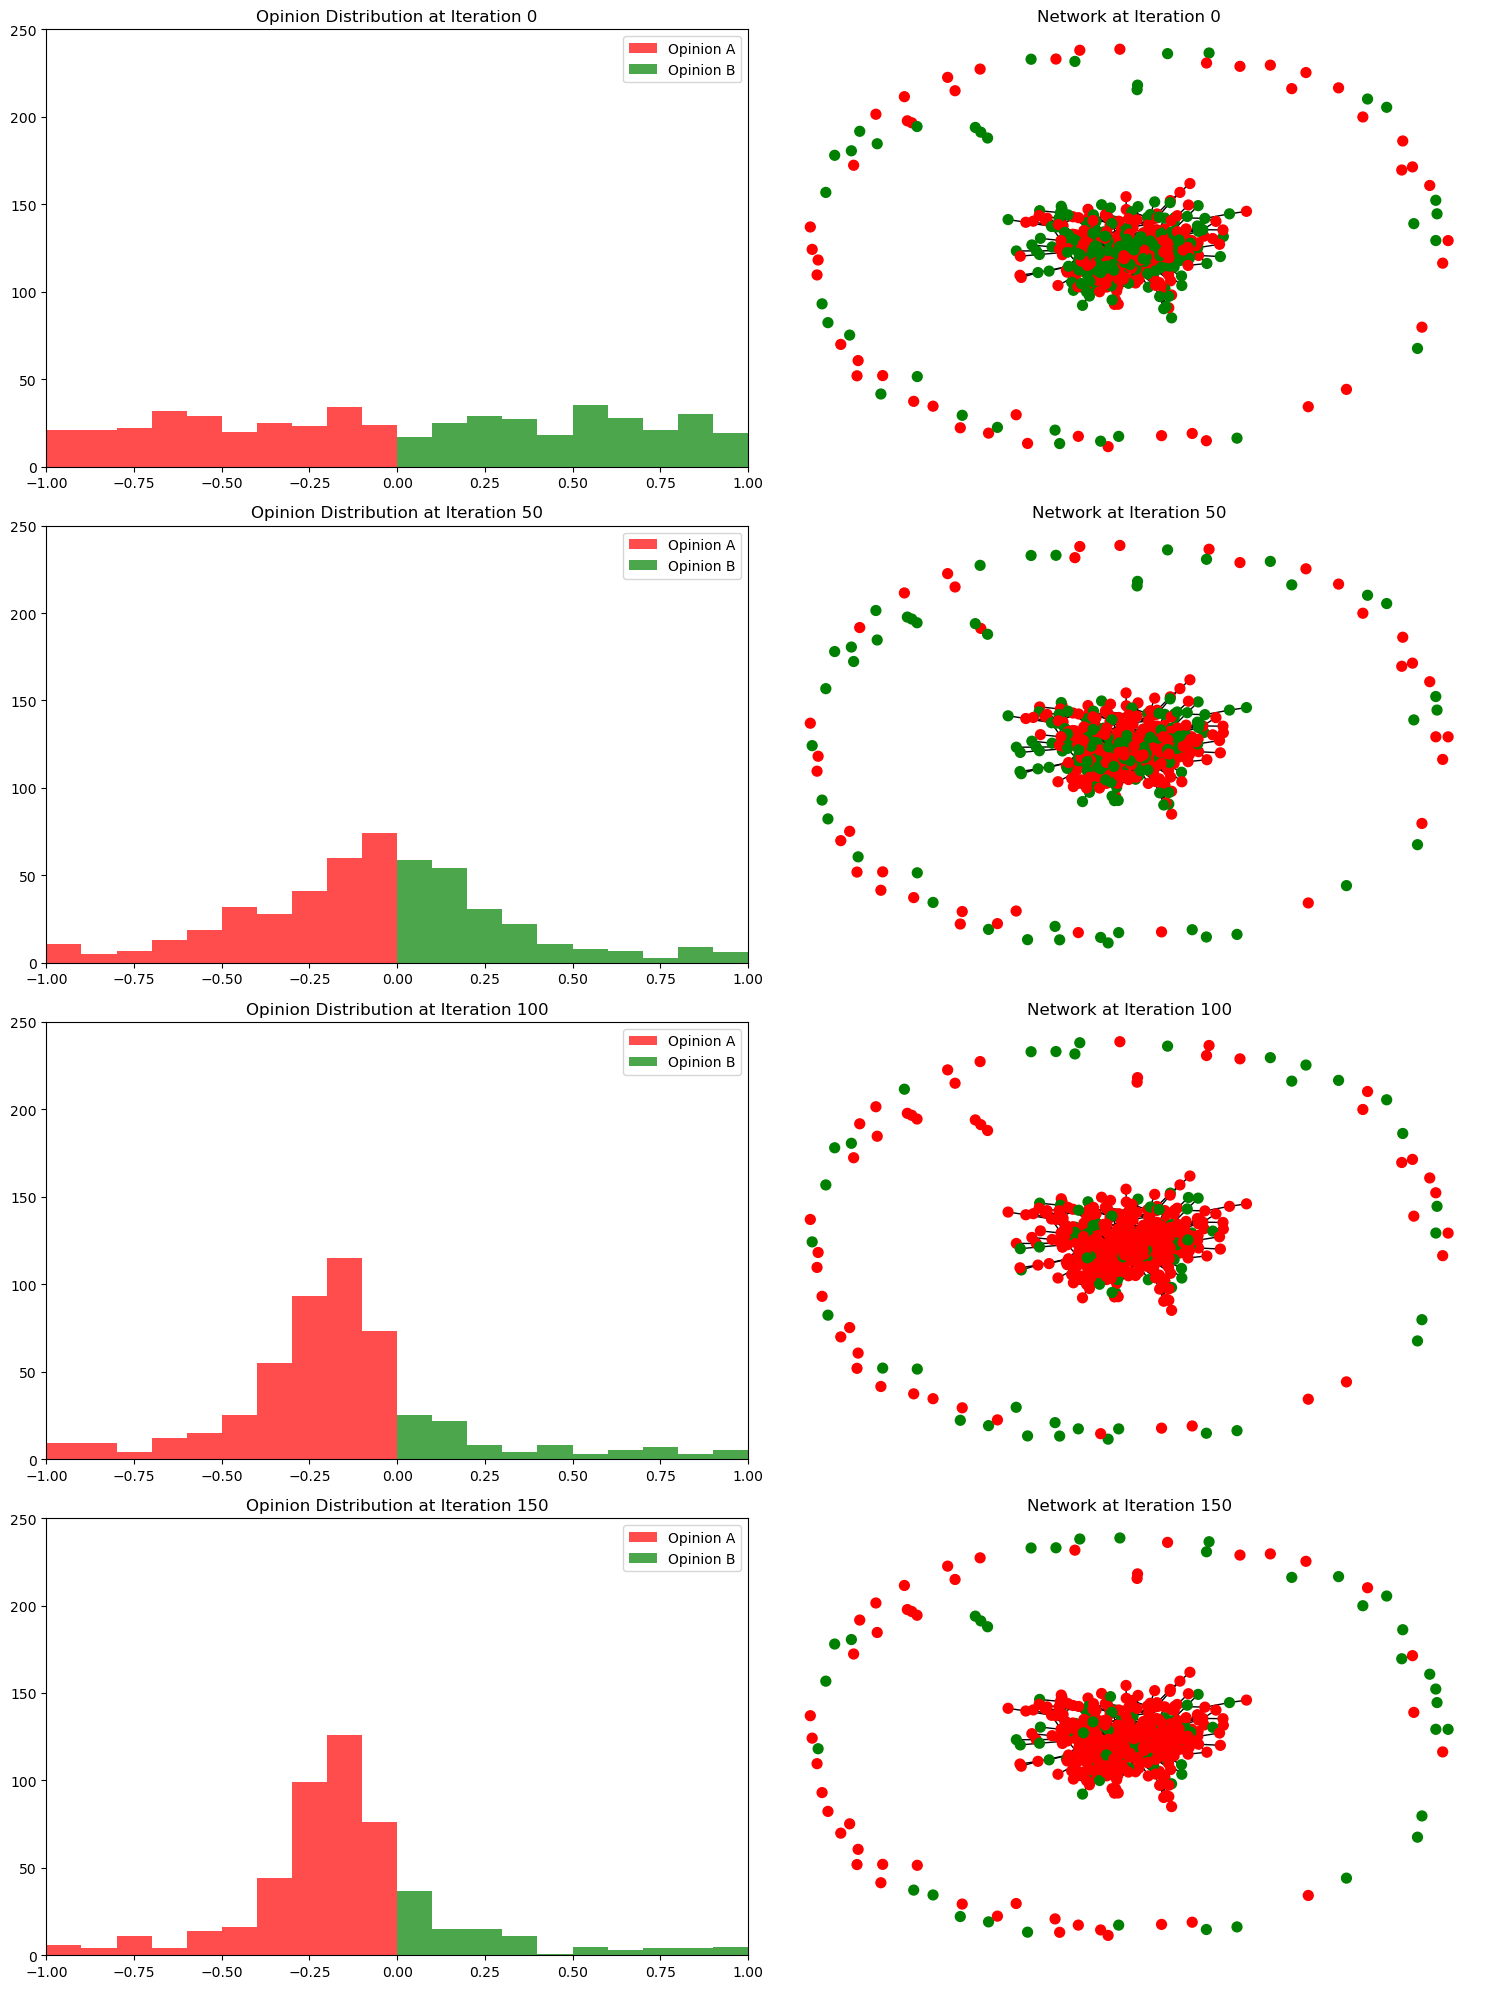

In [4]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

class Agent:
    def __init__(self, id, opinion, conformity, tolerance, target_degree):
        self.id = id
        self.opinion = opinion
        self.conformity = conformity
        self.tolerance = tolerance
        self.target_degree = target_degree

    def fluctuate_opinion(self, fluctuation_std=0.1):
        self.opinion = np.clip(np.random.normal(self.opinion, fluctuation_std), -1, 1)

    def conform_opinion(self, neighbors_opinions):
        if neighbors_opinions:
            mean_neighbors_opinion = np.mean(neighbors_opinions)
            self.opinion = self.conformity * mean_neighbors_opinion + (1 - self.conformity) * self.opinion

    def probability_break_bond(self, other_agent, opinion_range=1):
        opinion_difference = abs(self.opinion - other_agent.opinion)
        return (opinion_difference / opinion_range) * (1 - self.tolerance)

    def probability_make_bond(self, other_agent, opinion_range=1):
        opinion_difference = abs(self.opinion - other_agent.opinion)
        return (1 - (opinion_difference / opinion_range)) * self.tolerance * other_agent.tolerance

def initialize_agents(num_agents, opinion_range, conformity_range, tolerance_range, degree_range):
    agents = []
    for i in range(num_agents):
        opinion = np.random.uniform(*opinion_range)
        conformity = np.random.uniform(*conformity_range)
        tolerance = np.random.uniform(*tolerance_range)
        target_degree = np.random.randint(*degree_range)
        agents.append(Agent(i, opinion, conformity, tolerance, target_degree))
    return agents

def create_initial_network(agents):
    G = nx.Graph()
    for agent in agents:
        G.add_node(agent.id, agent=agent)
    return G

def fluctuate_all_agents(G, fluctuation_std=0.1):
    for node in G.nodes:
        agent = G.nodes[node]['agent']
        agent.fluctuate_opinion(fluctuation_std)

def conform_all_agents(G):
    for node in G.nodes:
        agent = G.nodes[node]['agent']
        neighbors_opinions = [G.nodes[neighbor]['agent'].opinion for neighbor in G.neighbors(node)]
        agent.conform_opinion(neighbors_opinions)

def break_bonds(G, opinion_range=1):
    edges_to_remove = []
    for (node_a, node_b) in G.edges:
        agent_a = G.nodes[node_a]['agent']
        agent_b = G.nodes[node_b]['agent']
        p_break = agent_a.probability_break_bond(agent_b, opinion_range)
        if np.random.rand() < p_break:
            edges_to_remove.append((node_a, node_b))
    G.remove_edges_from(edges_to_remove)

def form_bonds(G, opinion_range=1):
    for node in G.nodes:
        agent = G.nodes[node]['agent']
        if len(list(G.neighbors(node))) < agent.target_degree:
            potential_targets = set(G.nodes) - set(G.neighbors(node)) - {node}
            if potential_targets:
                target_node = np.random.choice(list(potential_targets))
                target_agent = G.nodes[target_node]['agent']
                p_click = agent.probability_make_bond(target_agent, opinion_range)
                if np.random.rand() < p_click:
                    G.add_edge(node, target_node)

def run_simulation(num_agents, num_iterations, opinion_range, conformity_range, tolerance_range, degree_range, fluctuation_std=0.1):
    agents = initialize_agents(num_agents, opinion_range, conformity_range, tolerance_range, degree_range)
    G = create_initial_network(agents)
    
    opinion_history = []

    for _ in range(num_iterations):
        fluctuate_all_agents(G, fluctuation_std)
        conform_all_agents(G)
        break_bonds(G)
        form_bonds(G)
        
        # Record the opinions of all agents at this iteration
        current_opinions = [G.nodes[node]['agent'].opinion for node in G.nodes]
        opinion_history.append(current_opinions)
    
    return G, opinion_history

def plot_opinion_distribution(opinion_history, num_iterations, num_agents, interval=10):
    num_plots = num_iterations // interval
    fig, axes = plt.subplots(nrows=num_plots, ncols=2, figsize=(15, 5 * num_plots))
    
    for i in range(num_plots):
        iteration = i * interval
        opinions = opinion_history[iteration]
        
        # Split opinions into two groups for separate plotting
        opinions_a = [o for o in opinions if o < 0]
        opinions_b = [o for o in opinions if o >= 0]
        
        # Plot the opinion distribution
        ax = axes[i][0]
        ax.hist(opinions_a, bins=10, range=(-1, 0), alpha=0.7, color='red', label='Opinion A')
        ax.hist(opinions_b, bins=10, range=(0, 1), alpha=0.7, color='green', label='Opinion B')
        ax.set_title(f'Opinion Distribution at Iteration {iteration}')
        ax.set_xlim(-1, 1)
        ax.set_ylim(0, num_agents // 2)
        ax.legend()

        # Plot the network
        ax = axes[i][1]
        plot_network(G, opinions, ax, iteration)
    
    plt.tight_layout()
    plt.show()

def plot_network(G, opinions, ax, iteration):
    pos = nx.spring_layout(G, seed=42)
    colors = ['red' if o < 0 else 'green' for o in opinions]
    nx.draw(G, pos, node_color=colors, with_labels=False, node_size=50, cmap=plt.cm.RdBu, ax=ax)
    ax.set_title(f'Network at Iteration {iteration}')

# Parameters for the simulation
num_agents = 500
num_iterations = 200
opinion_range = (-1, 1)
conformity_range = (0, 1)
tolerance_range = (0, 1)
degree_range = (1, 5)

# Run the simulation and collect opinion history
G, opinion_history = run_simulation(num_agents, num_iterations, opinion_range, conformity_range, tolerance_range, degree_range)

# Plot the opinion distribution and network
plot_opinion_distribution(opinion_history, num_iterations, num_agents, interval=50)


## BA network

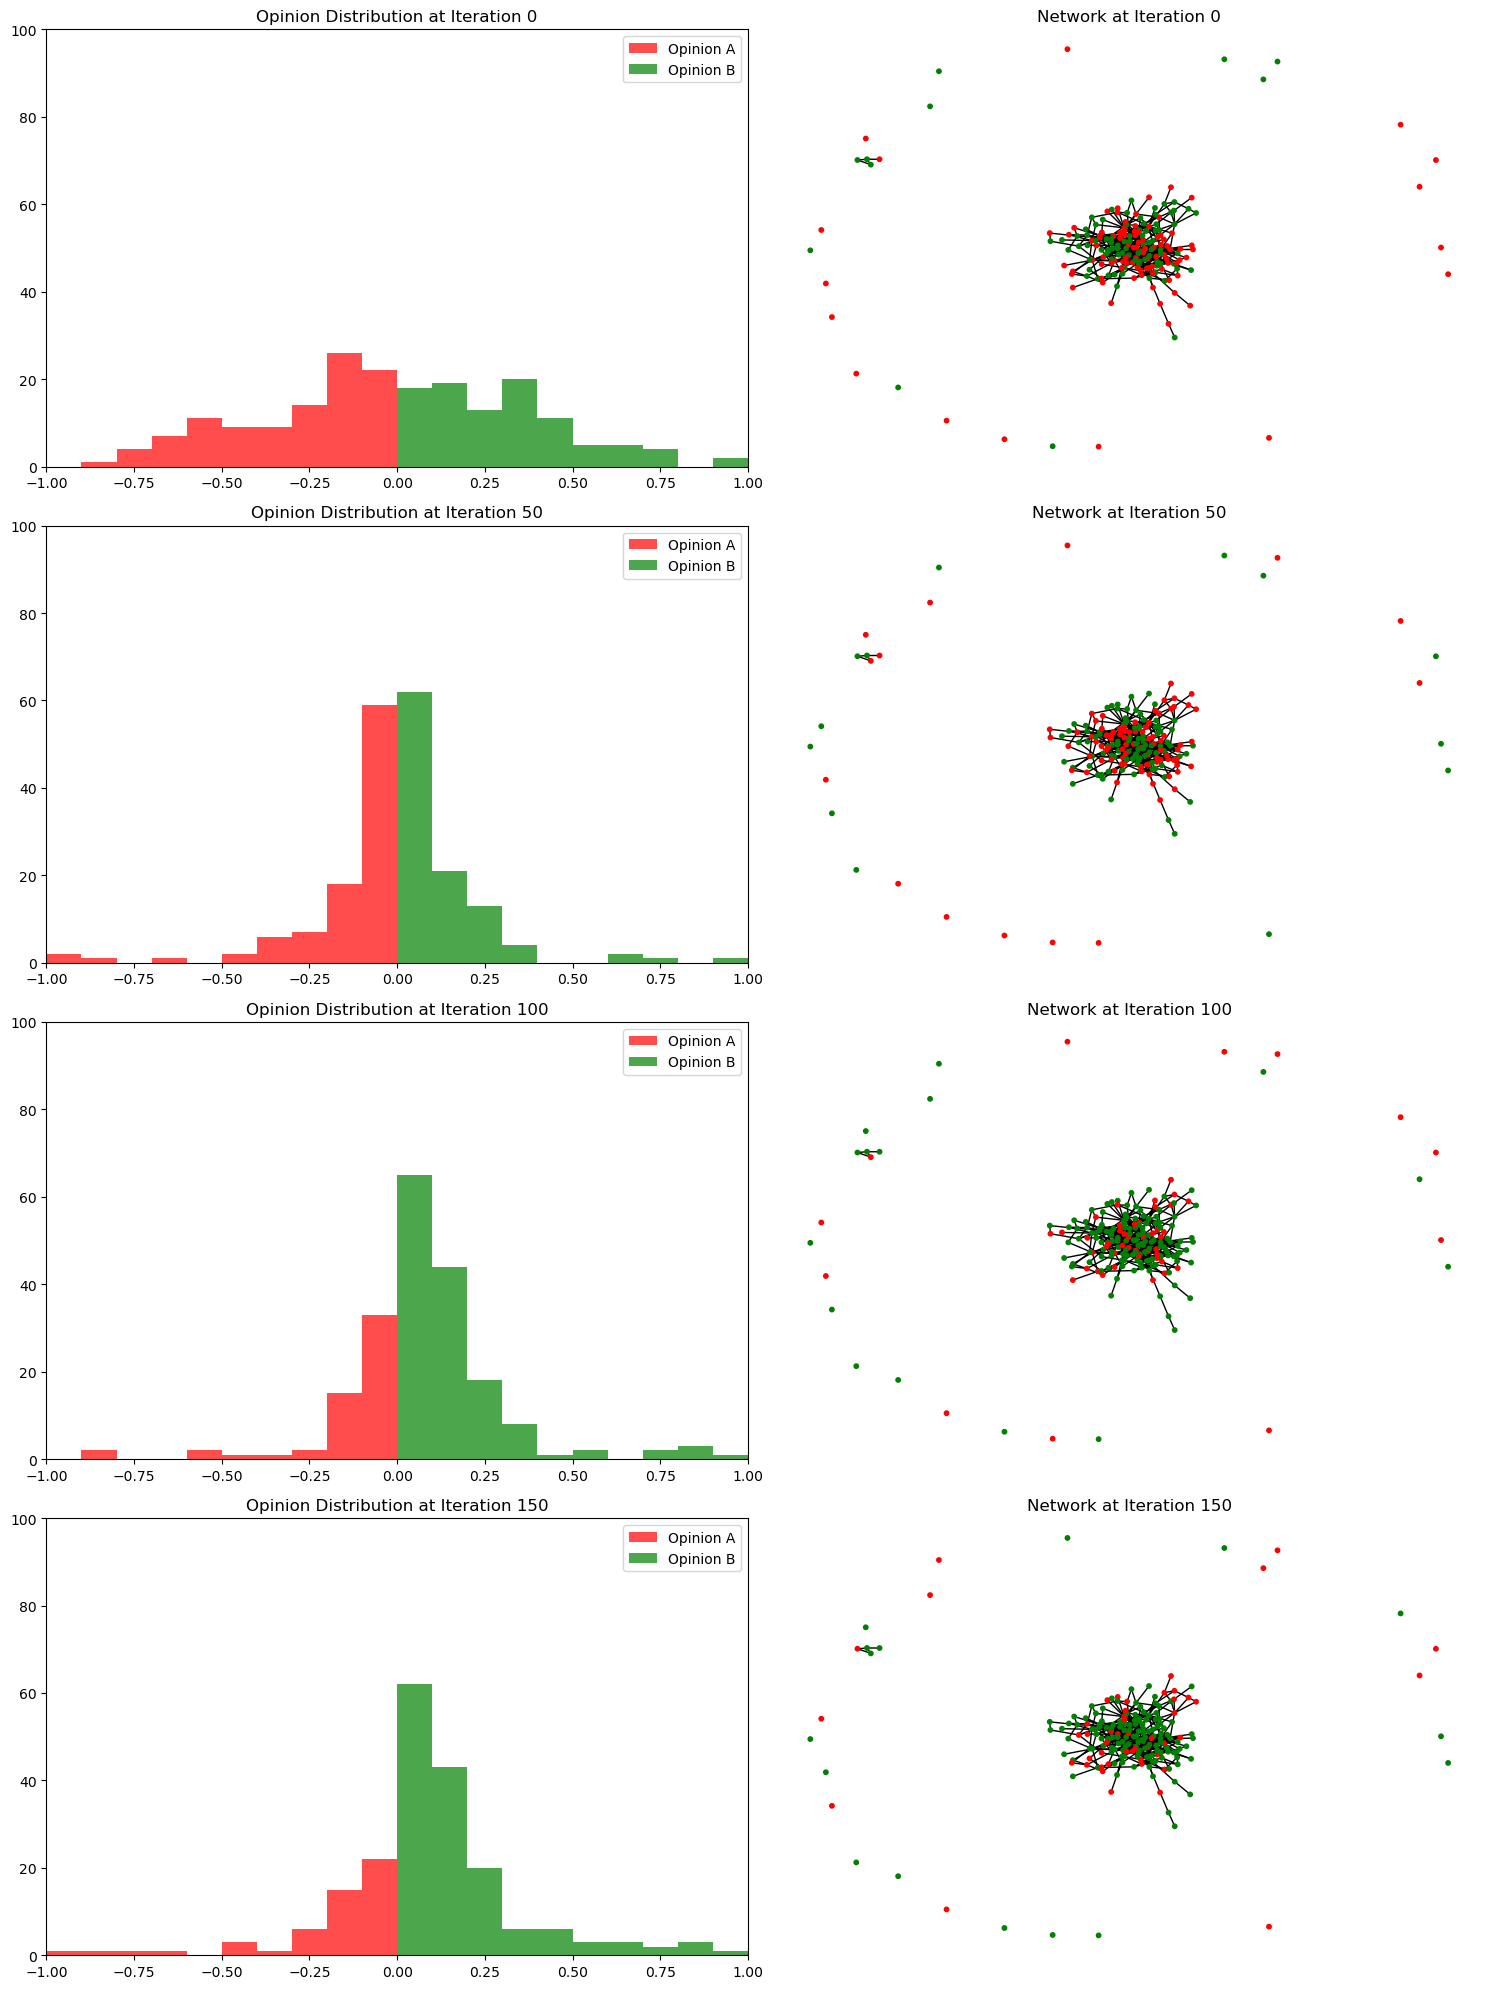

In [4]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

class Agent:
    def __init__(self, id, opinion, conformity, tolerance, target_degree):
        self.id = id
        self.opinion = opinion
        self.conformity = conformity
        self.tolerance = tolerance
        self.target_degree = target_degree

    def fluctuate_opinion(self, fluctuation_std=0.1):
        self.opinion = np.clip(np.random.normal(self.opinion, fluctuation_std), -1, 1)

    def conform_opinion(self, neighbors_opinions):
        if neighbors_opinions:
            mean_neighbors_opinion = np.mean(neighbors_opinions)
            self.opinion = self.conformity * mean_neighbors_opinion + (1 - self.conformity) * self.opinion

    def probability_break_bond(self, other_agent, opinion_range=1):
        opinion_difference = abs(self.opinion - other_agent.opinion)
        return (opinion_difference / opinion_range) * (1 - self.tolerance)

    def probability_make_bond(self, other_agent, opinion_range=1):
        opinion_difference = abs(self.opinion - other_agent.opinion)
        return (1 - (opinion_difference / opinion_range)) * self.tolerance * other_agent.tolerance

def initialize_agents(num_agents, opinion_range, conformity_range, tolerance_range, degree_list):
    agents = []
    for i in range(num_agents):
        opinion = np.random.uniform(*opinion_range)
        conformity = np.random.uniform(*conformity_range)
        tolerance = np.random.uniform(*tolerance_range)
        target_degree = degree_list[i]
        agents.append(Agent(i, opinion, conformity, tolerance, target_degree))
    return agents

def create_initial_network(num_agents, m):
    G = nx.barabasi_albert_graph(num_agents, m)
    return G

def fluctuate_all_agents(G, fluctuation_std=0.1):
    for node in G.nodes:
        agent = G.nodes[node]['agent']
        agent.fluctuate_opinion(fluctuation_std)

def conform_all_agents(G):
    for node in G.nodes:
        agent = G.nodes[node]['agent']
        neighbors_opinions = [G.nodes[neighbor]['agent'].opinion for neighbor in G.neighbors(node)]
        agent.conform_opinion(neighbors_opinions)

def break_bonds(G, opinion_range=1):
    edges_to_remove = []
    for (node_a, node_b) in G.edges:
        agent_a = G.nodes[node_a]['agent']
        agent_b = G.nodes[node_b]['agent']
        p_break = agent_a.probability_break_bond(agent_b, opinion_range)
        if np.random.rand() < p_break:
            edges_to_remove.append((node_a, node_b))
    G.remove_edges_from(edges_to_remove)

def form_bonds(G, opinion_range=1):
    for node in G.nodes:
        agent = G.nodes[node]['agent']
        if len(list(G.neighbors(node))) < agent.target_degree:
            potential_targets = set(G.nodes) - set(G.neighbors(node)) - {node}
            if potential_targets:
                target_node = np.random.choice(list(potential_targets))
                target_agent = G.nodes[target_node]['agent']
                p_click = agent.probability_make_bond(target_agent, opinion_range)
                if np.random.rand() < p_click:
                    G.add_edge(node, target_node)

def run_simulation(num_agents, num_iterations, opinion_range, conformity_range, tolerance_range, degree_range, m, fluctuation_std=0.1):
    # Create a BA network
    G = create_initial_network(num_agents, m)
    degree_list = [G.degree[node] for node in G.nodes]
    agents = initialize_agents(num_agents, opinion_range, conformity_range, tolerance_range, degree_list)
    
    # Assign agents to the graph nodes
    for i, agent in enumerate(agents):
        G.nodes[i]['agent'] = agent
    
    opinion_history = []

    for _ in range(num_iterations):
        fluctuate_all_agents(G, fluctuation_std)
        conform_all_agents(G)
        break_bonds(G)
        form_bonds(G)
        
        # Record the opinions of all agents at this iteration
        current_opinions = [G.nodes[node]['agent'].opinion for node in G.nodes]
        opinion_history.append(current_opinions)
    
    return G, opinion_history

def plot_opinion_distribution(opinion_history, num_iterations, num_agents, interval=10):
    num_plots = num_iterations // interval
    fig, axes = plt.subplots(nrows=num_plots, ncols=2, figsize=(15, 5 * num_plots))
    
    for i in range(num_plots):
        iteration = i * interval
        opinions = opinion_history[iteration]
        
        # Split opinions into two groups for separate plotting
        opinions_a = [o for o in opinions if o < 0]
        opinions_b = [o for o in opinions if o >= 0]
        
        # Plot the opinion distribution
        ax = axes[i][0]
        ax.hist(opinions_a, bins=10, range=(-1, 0), alpha=0.7, color='red', label='Opinion A')
        ax.hist(opinions_b, bins=10, range=(0, 1), alpha=0.7, color='green', label='Opinion B')
        ax.set_title(f'Opinion Distribution at Iteration {iteration}')
        ax.set_xlim(-1, 1)
        ax.set_ylim(0, num_agents // 2)
        ax.legend()

        # Plot the network
        ax = axes[i][1]
        plot_network(G, opinions, ax, iteration)
    
    plt.tight_layout()
    plt.show()

def plot_network(G, opinions, ax, iteration):
    pos = nx.spring_layout(G, seed=42)
    colors = ['red' if o < 0 else 'green' for o in opinions]
    nx.draw(G, pos, node_color=colors, with_labels=False, node_size=10, cmap=plt.cm.RdBu, ax=ax)
    ax.set_title(f'Network at Iteration {iteration}')

# Parameters for the simulation
num_agents = 200
num_iterations = 200
opinion_range = (-1, 1)
conformity_range = (0, 1)
tolerance_range = (0, 1)
degree_range = (1, 5)
m = 2  # Number of edges to attach from a new node to existing nodes in the BA model

# Run the simulation and collect opinion history
G, opinion_history = run_simulation(num_agents, num_iterations, opinion_range, conformity_range, tolerance_range, degree_range, m)

# Plot the opinion distribution and network
plot_opinion_distribution(opinion_history, num_iterations, num_agents, interval=50)
